In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize 

In [4]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))
    

In [5]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))

    return(J)

In [6]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

def predict(theta, X, y):
    m = y.size
    p = sigmoid(X.dot(theta))
    count = 0
    for iter in range(0,m):
        if p[iter] < 0.5:
            p[iter] = 0
        else:
            p[iter] = 1
        if p[iter] == y[iter,0]:
            count += 1
    acu = count*100/m
    return(acu)

def plotData(data, label_x, label_y, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,8] == 0
    pos = data[:,8] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,7], marker='+', c='k', s=60, linewidth=2)
    axes.scatter(data[neg][:,0], data[neg][:,7], c='y', s=60)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)


In [8]:
df = pd.read_csv('C:/Users/user/Downloads/Logistic_reg_project/Smarket.csv')


In [9]:

a= {'Up': 1,'Down': 0} 
df.Direction = [a[item] for item in df.Direction] 

In [10]:
data = np.array(df)
print(data.shape)
X = data[:,:7]
X = np.column_stack((np.ones((X.shape[0],1)), X))
y = data[:,8]
y = y.reshape(len(y),1)
X,x_test,y,y_test = train_test_split(X, y, test_size = 0.3)
df.head()


(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [11]:
print('Feature: \n',X[:5,:])

print( 'Labels :\n',y[:5])

print('X shape : ', X.shape)
print('y shape : ', y.shape)

Feature: 
 [[ 1.00000e+00  2.00500e+03  1.01000e-01  2.00000e-03  2.80000e-02
   5.50000e-02  3.65000e-01  2.10698e+00]
 [ 1.00000e+00  2.00200e+03 -1.20900e+00  1.01800e+00  5.69000e-01
  -1.09900e+00 -1.32900e+00  8.85400e-01]
 [ 1.00000e+00  2.00400e+03  4.49000e-01  2.79000e-01 -7.05000e-01
   2.23000e-01  1.69000e-01  1.42260e+00]
 [ 1.00000e+00  2.00300e+03  7.02000e-01 -6.50000e-02  4.79000e-01
  -5.26000e-01  4.74000e-01  1.04050e+00]
 [ 1.00000e+00  2.00500e+03 -1.22000e-01 -5.01000e-01  1.28000e-01
  -2.36000e-01  3.20000e-02  2.17830e+00]]
Labels :
 [[1.]
 [0.]
 [0.]
 [1.]
 [1.]]
X shape :  (875, 8)
y shape :  (875, 1)


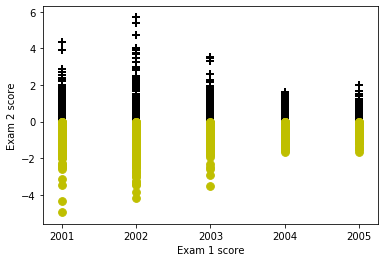

In [12]:
plotData(data, 'Exam 1 score', 'Exam 2 score')


In [13]:

initial_theta = np.zeros(X.shape[1])
print(initial_theta)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
cost = costFunction(initial_theta, X, y)
print('Cost: \n', cost)

Cost: 
 [0.69314718]


In [15]:
grad = gradient(initial_theta, X, y)
print('Grad: \n', grad)

Grad: 
 [-2.57142857e-02 -5.15731429e+01 -2.33028571e-03  3.69594286e-02
 -8.90571429e-03 -1.13091429e-02  3.48457143e-03 -4.45661543e-02]


In [16]:
from scipy.optimize import minimize 

In [17]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
Theta_trained = res.x
Theta_trained = Theta_trained.reshape(len(Theta_trained),1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [18]:
print(Theta_trained)

[[-3.31154771e+02]
 [ 1.65510099e-01]
 [-2.39141509e-03]
 [-1.29338639e-01]
 [ 8.55596073e-03]
 [ 1.58523110e-02]
 [-2.58514299e-02]
 [-1.76865893e-01]]


In [22]:
p = predict(Theta_trained, x_test, y_test) 
print('Accuracy : ',p,'%')

Accuracy :  48.53333333333333 %


## LOGISTIC REGRESSION WITH THE HELP OF SKLEARN

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [27]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
predict = model.predict(X_test)

In [29]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.63      0.17      0.26       132
         1.0       0.52      0.90      0.66       131

    accuracy                           0.53       263
   macro avg       0.57      0.53      0.46       263
weighted avg       0.57      0.53      0.46       263



In [30]:
print(confusion_matrix(y_test, predict))

[[ 22 110]
 [ 13 118]]
